<a href="https://colab.research.google.com/github/Aakriti555/Udemy_course_deepLearning-/blob/main/Machine_learning_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

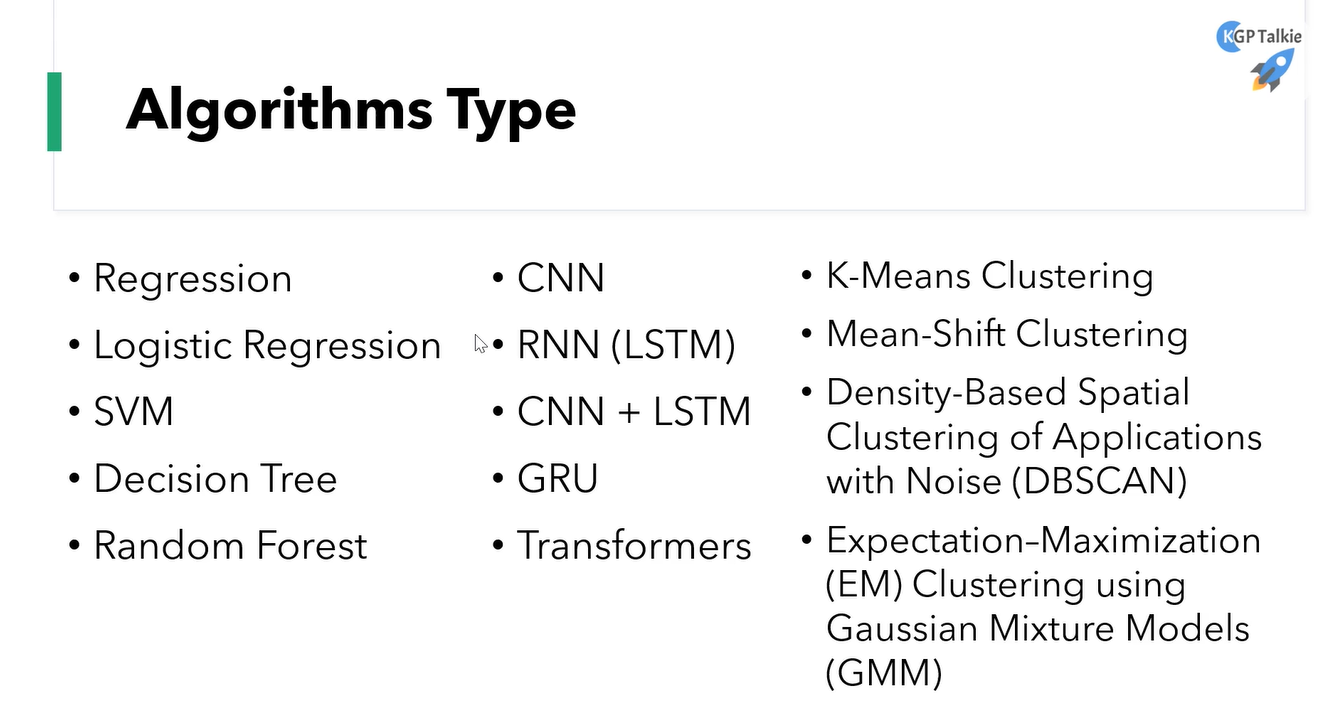

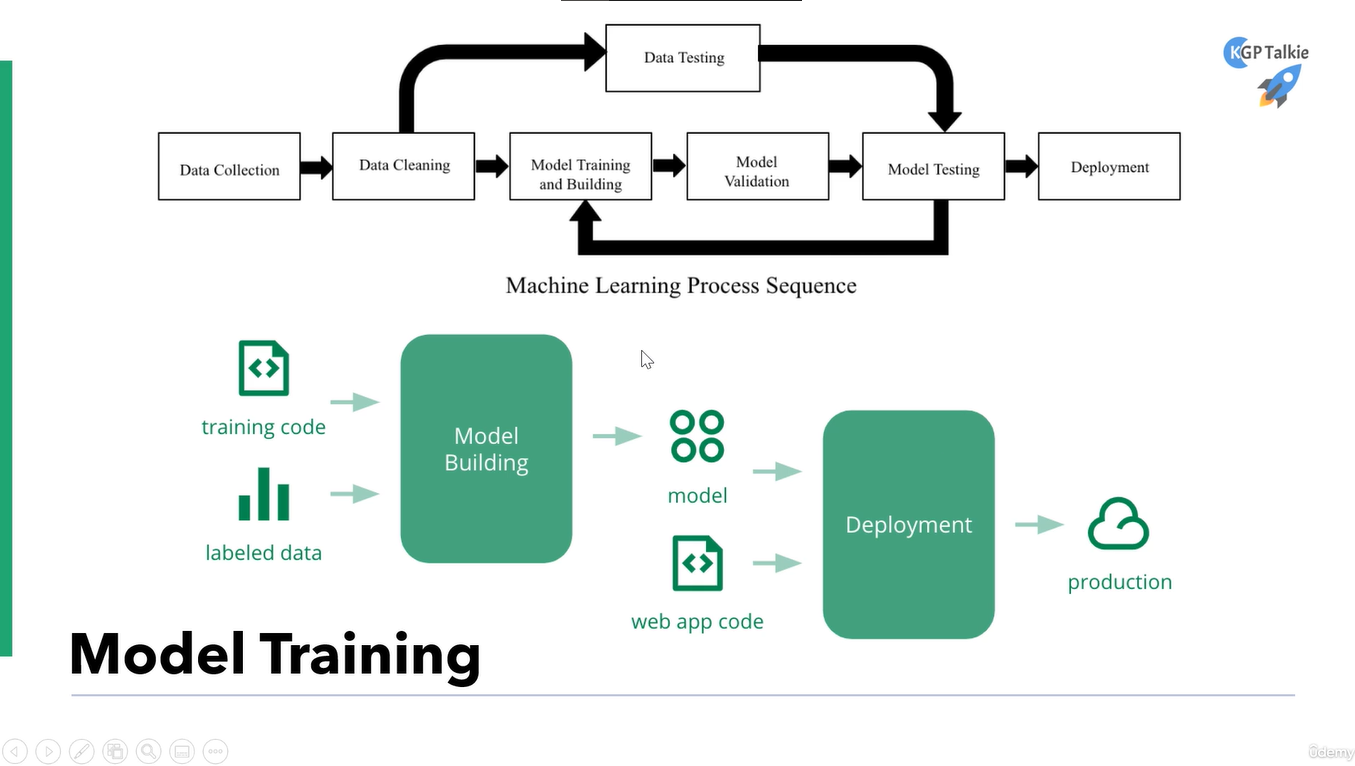

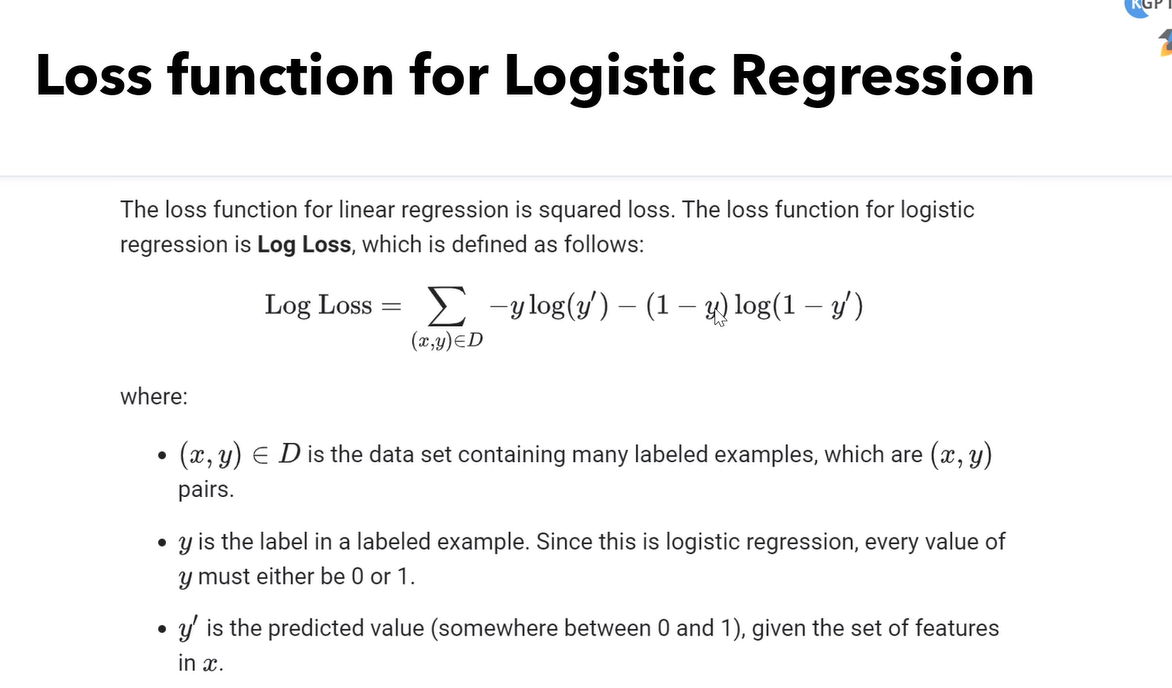

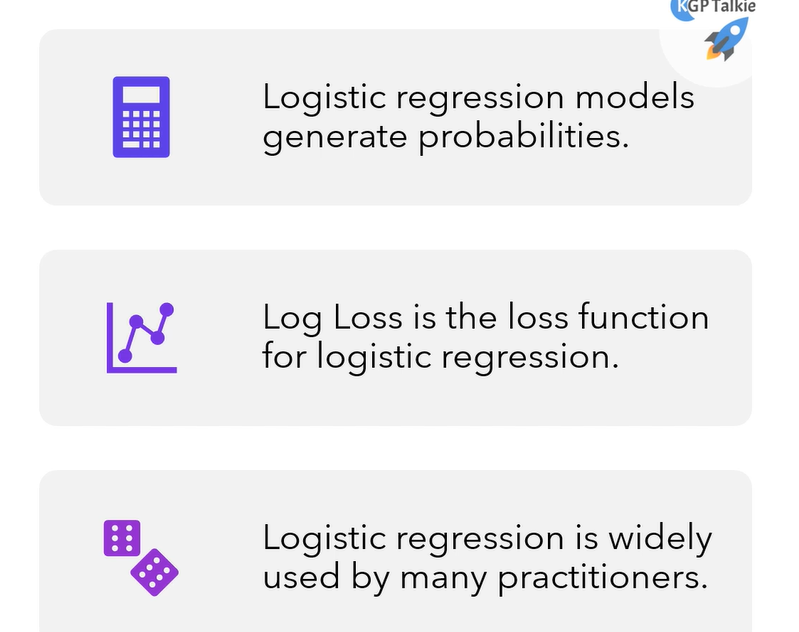

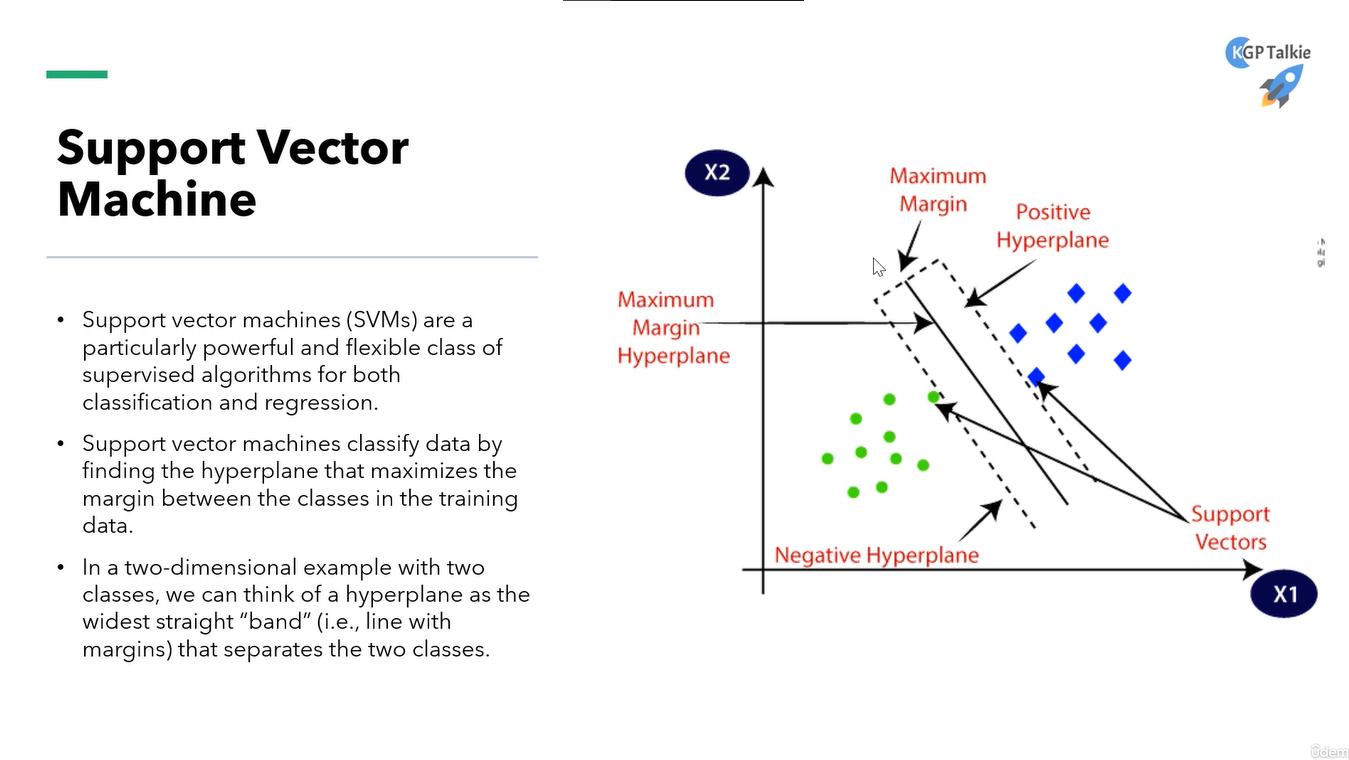

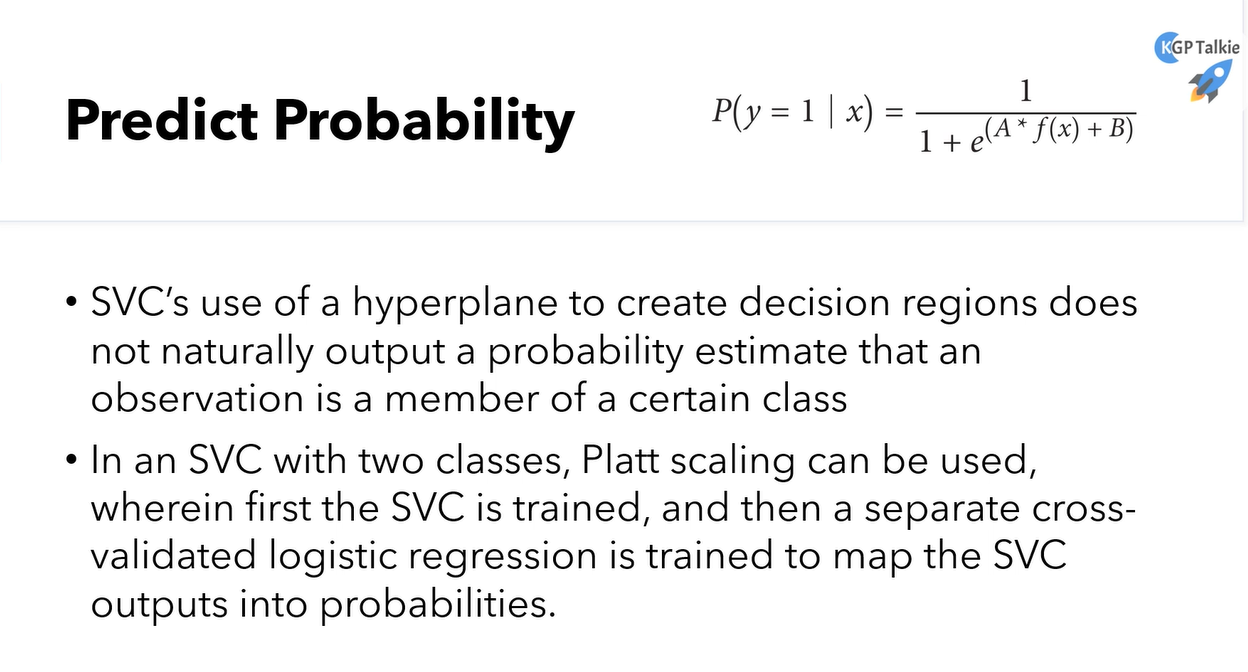

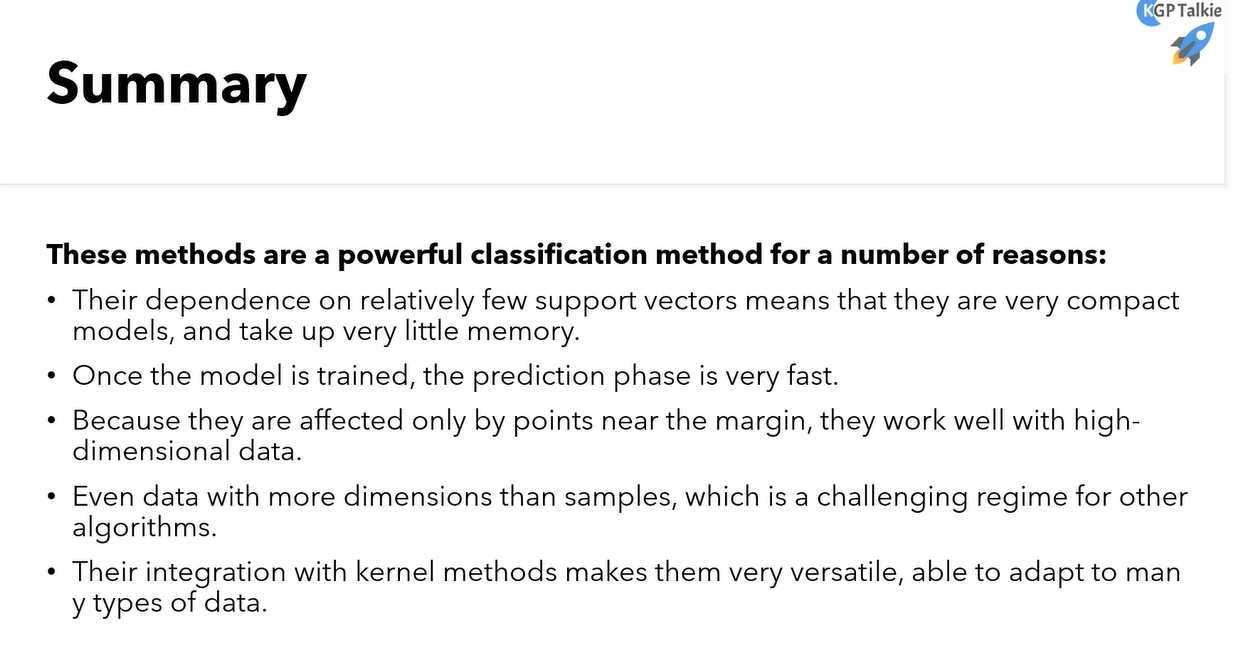

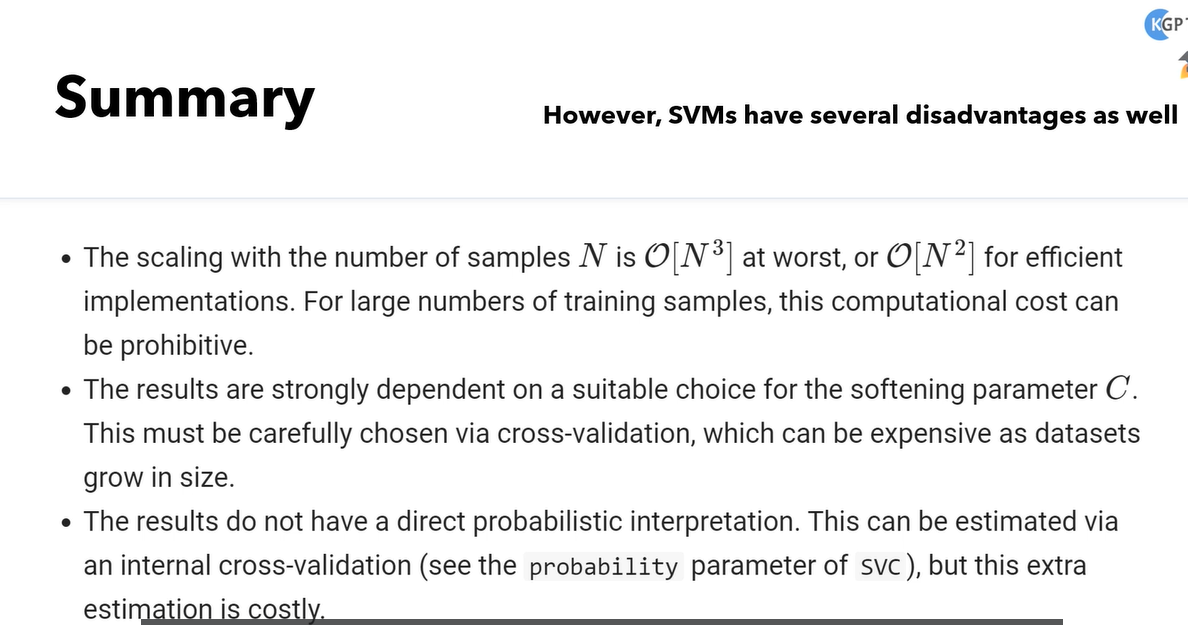

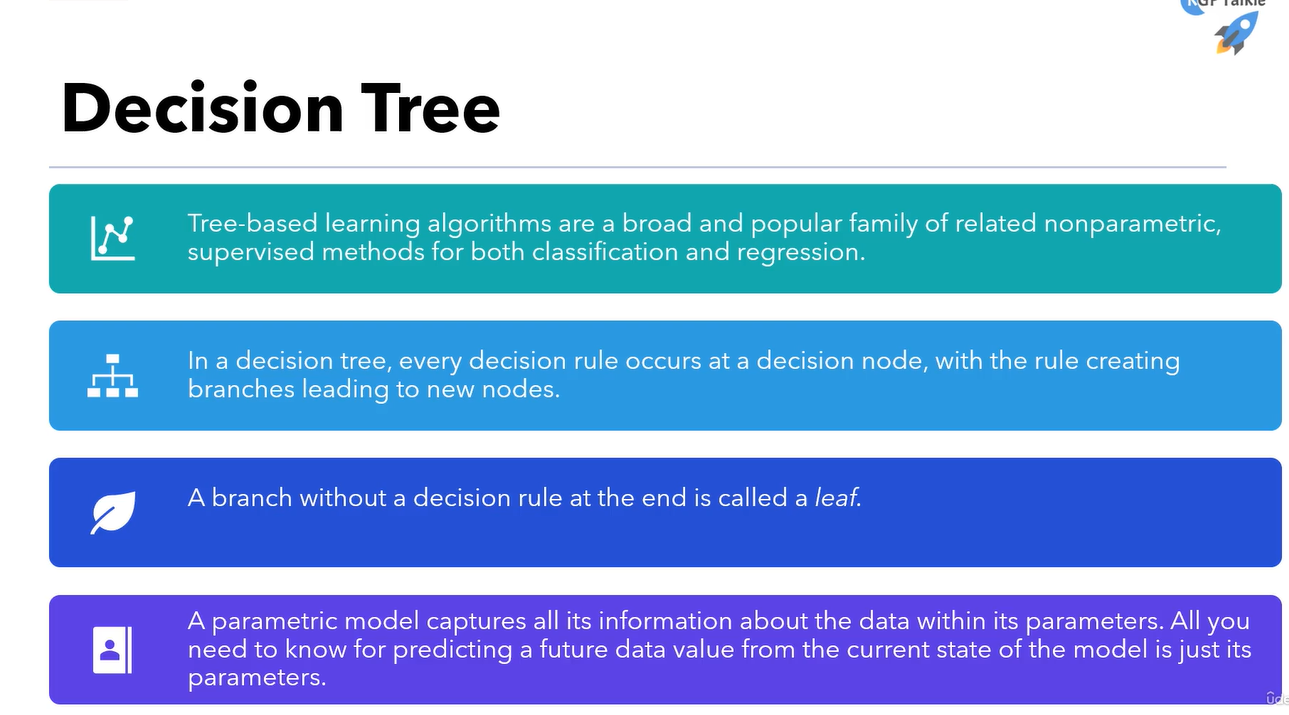

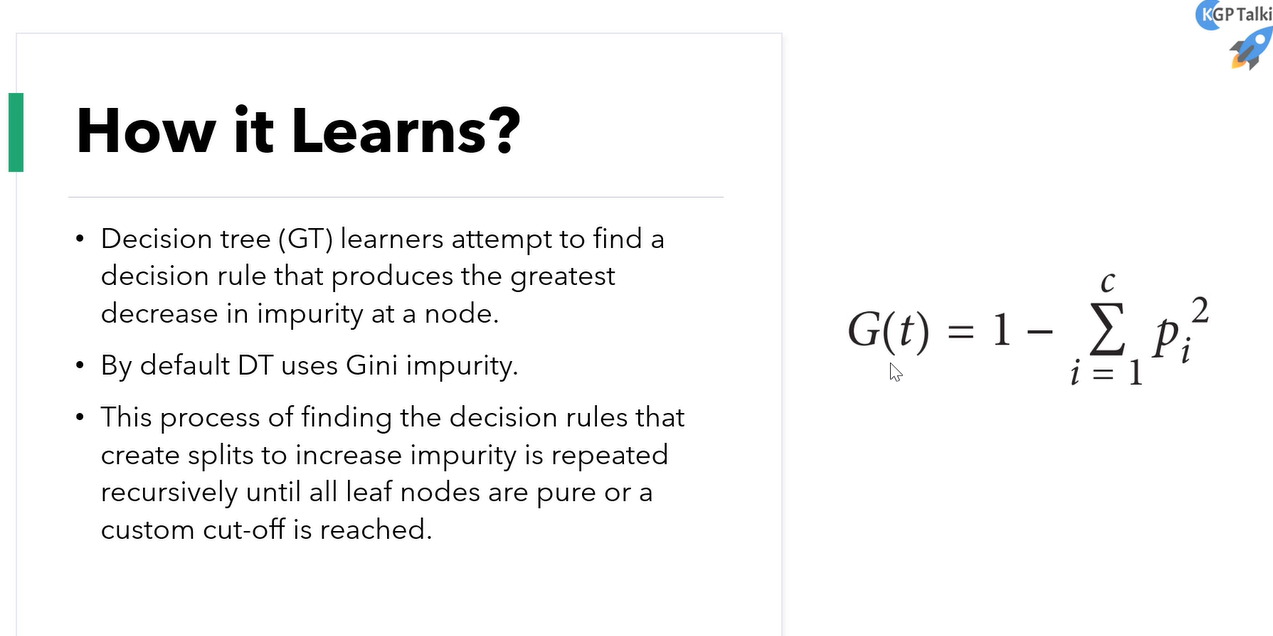

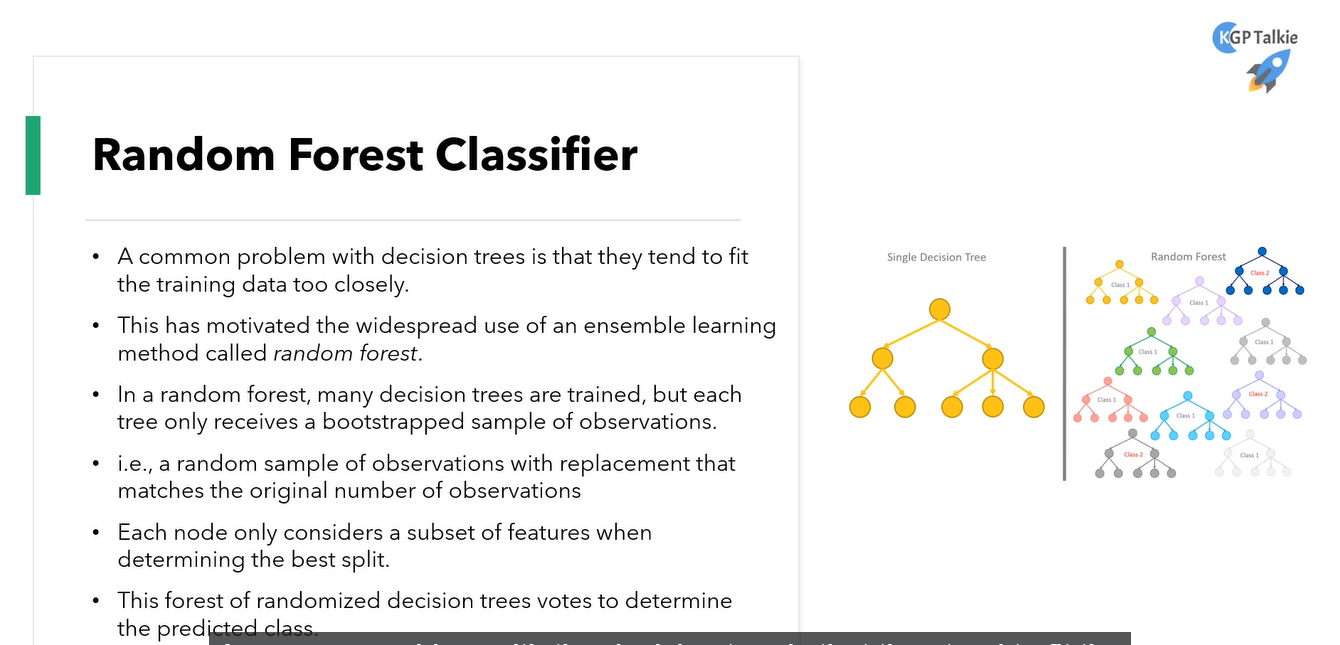

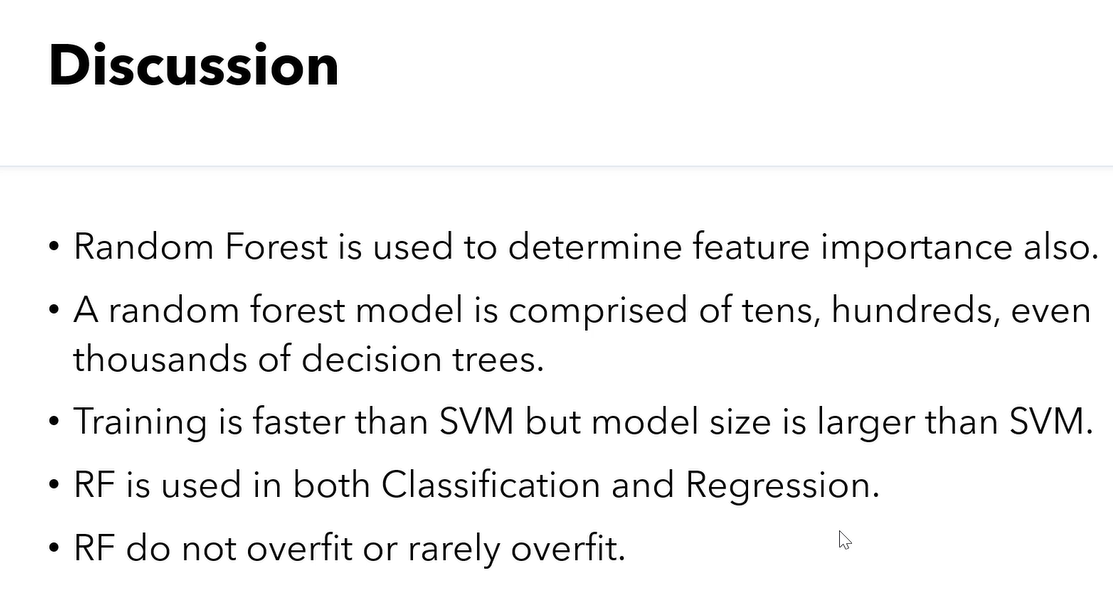

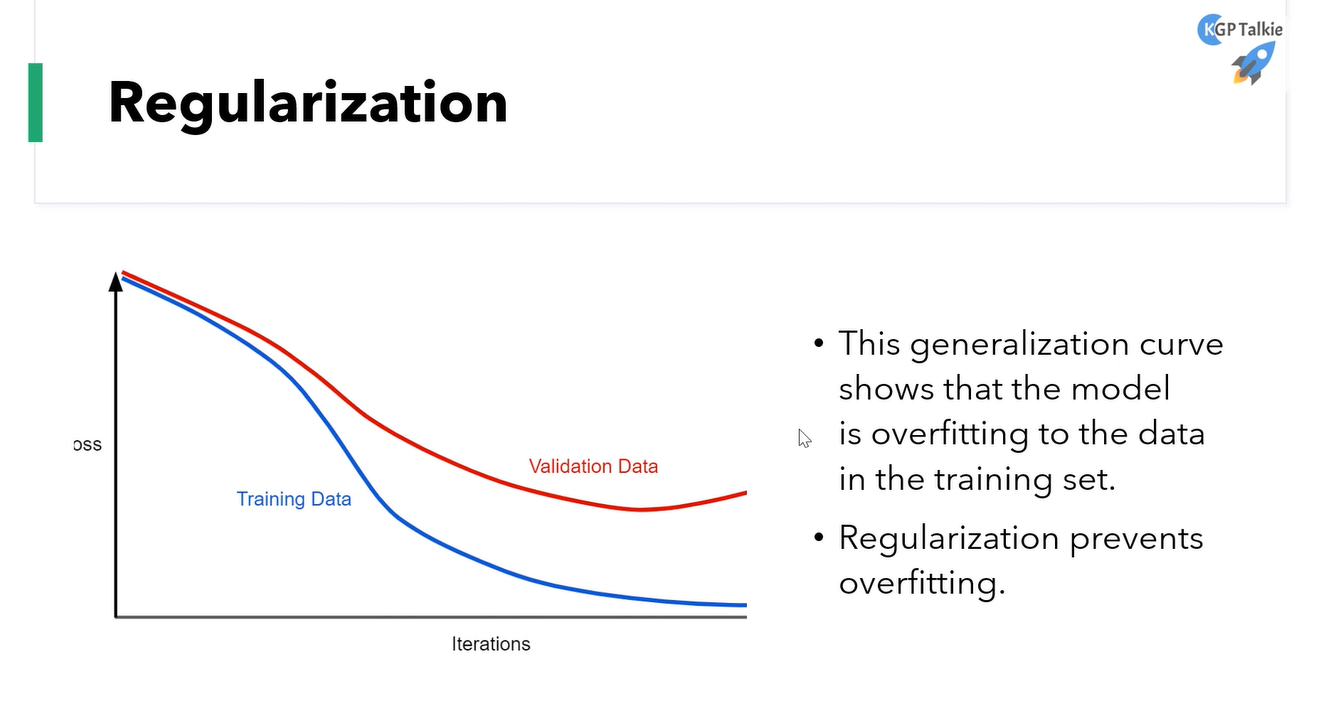

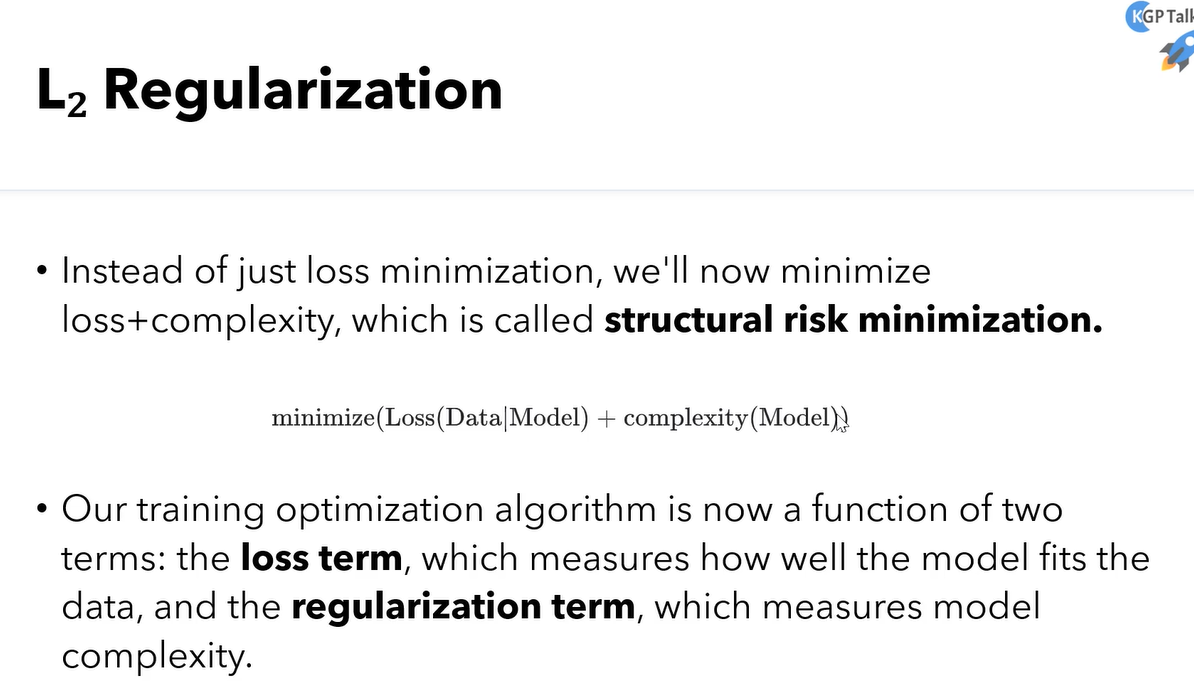

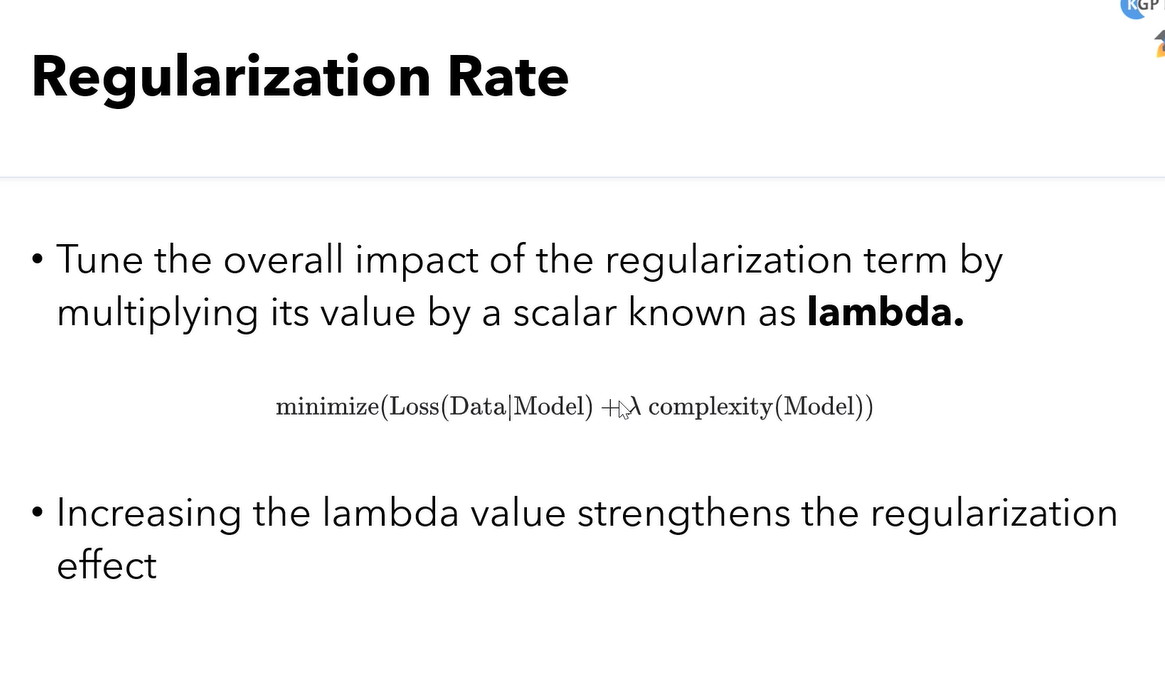

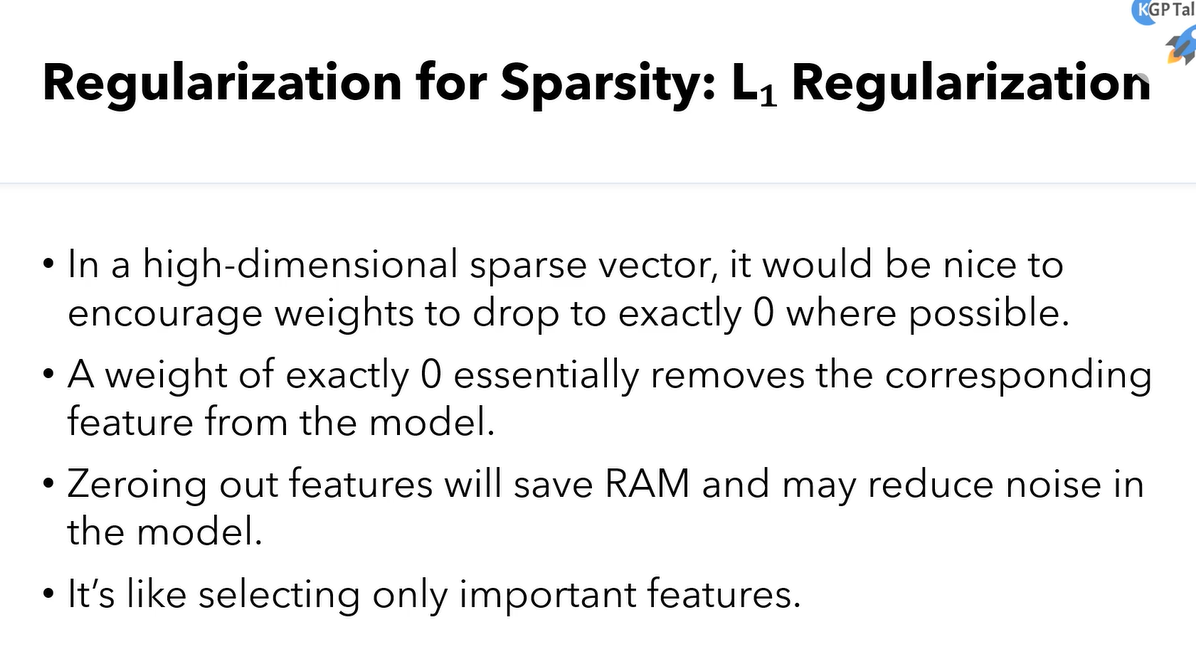

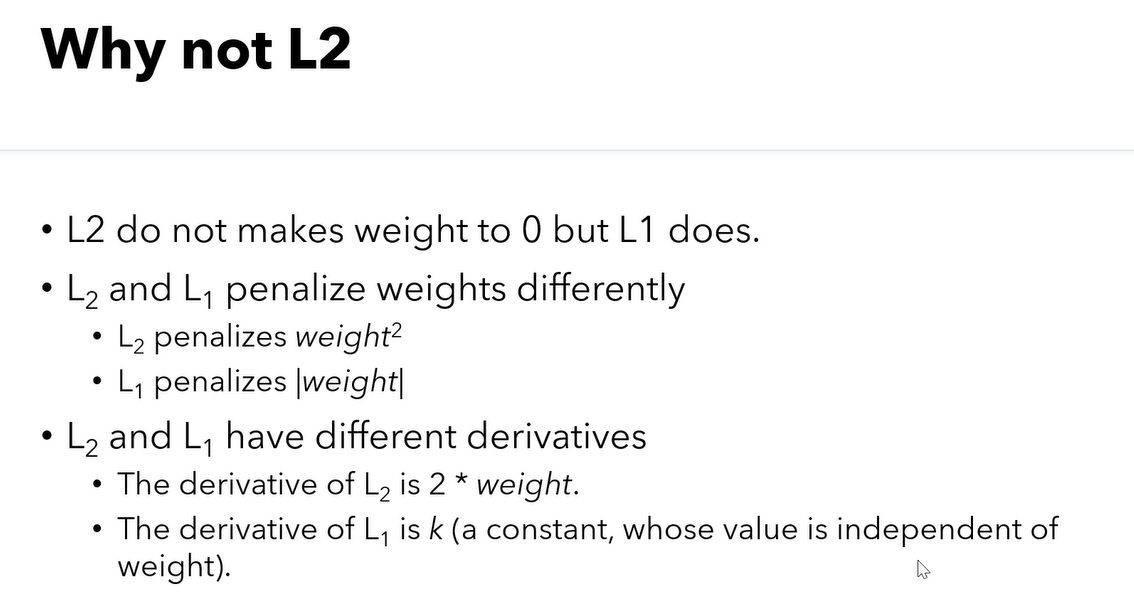

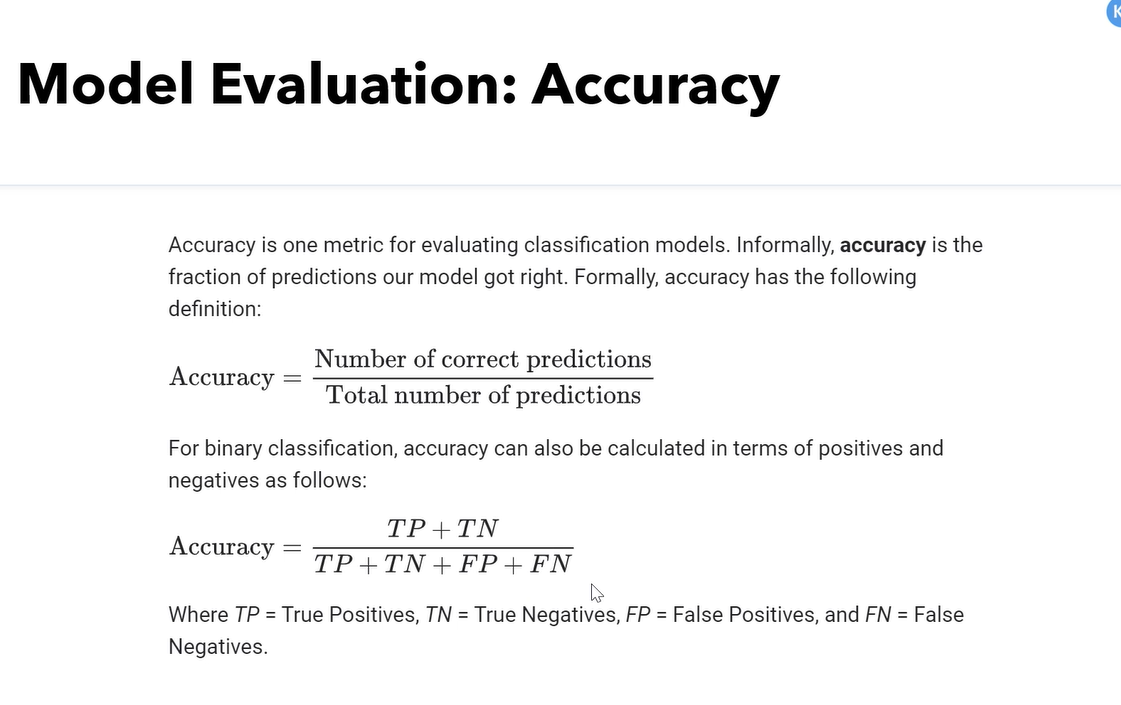

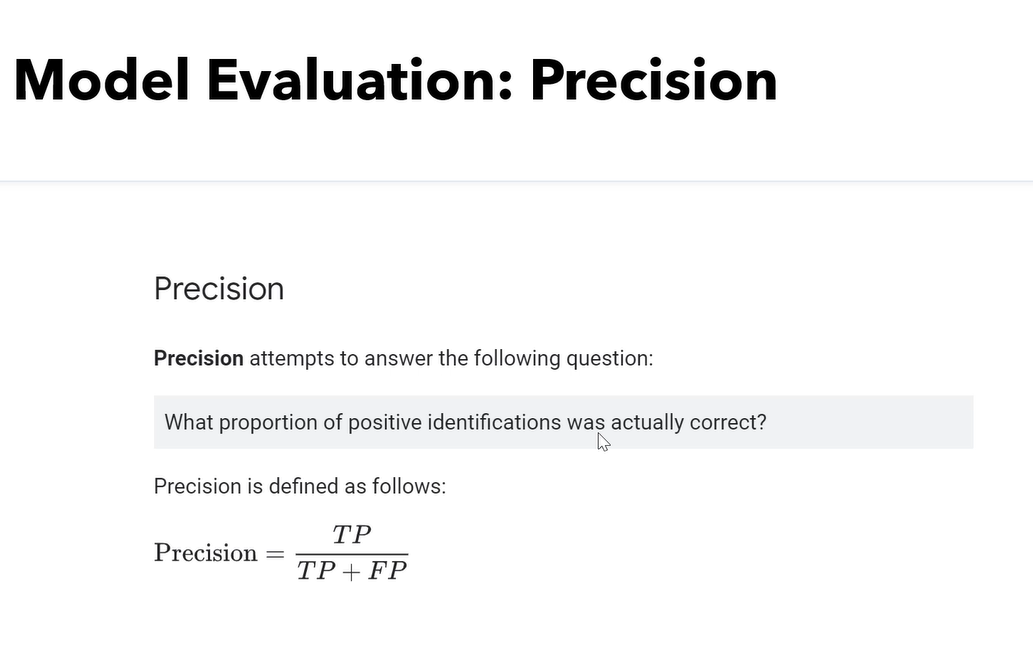

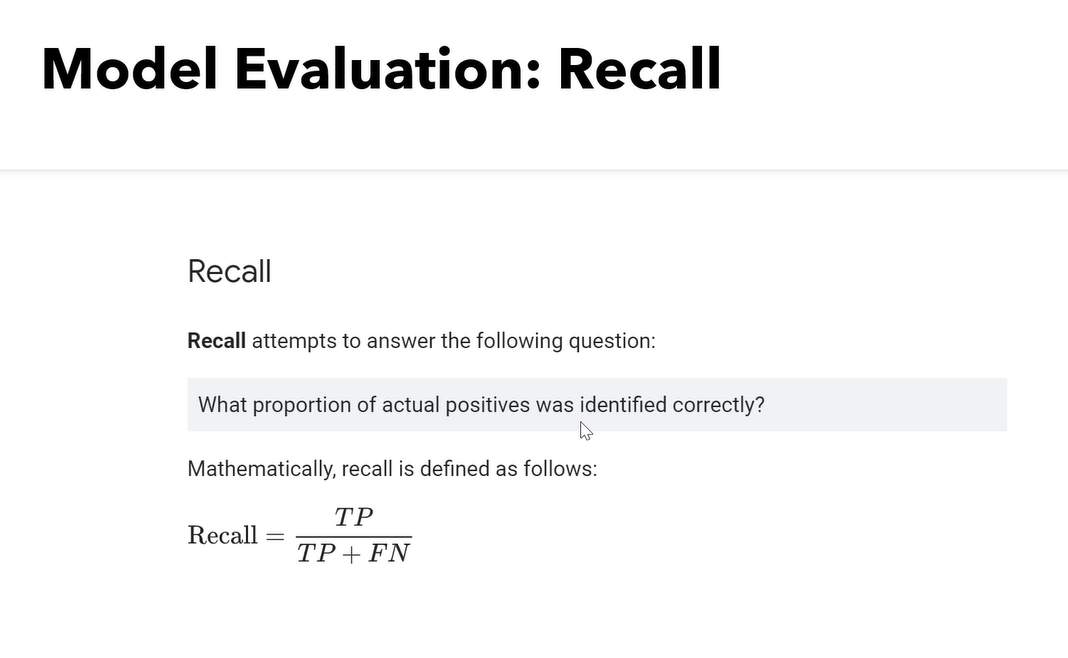

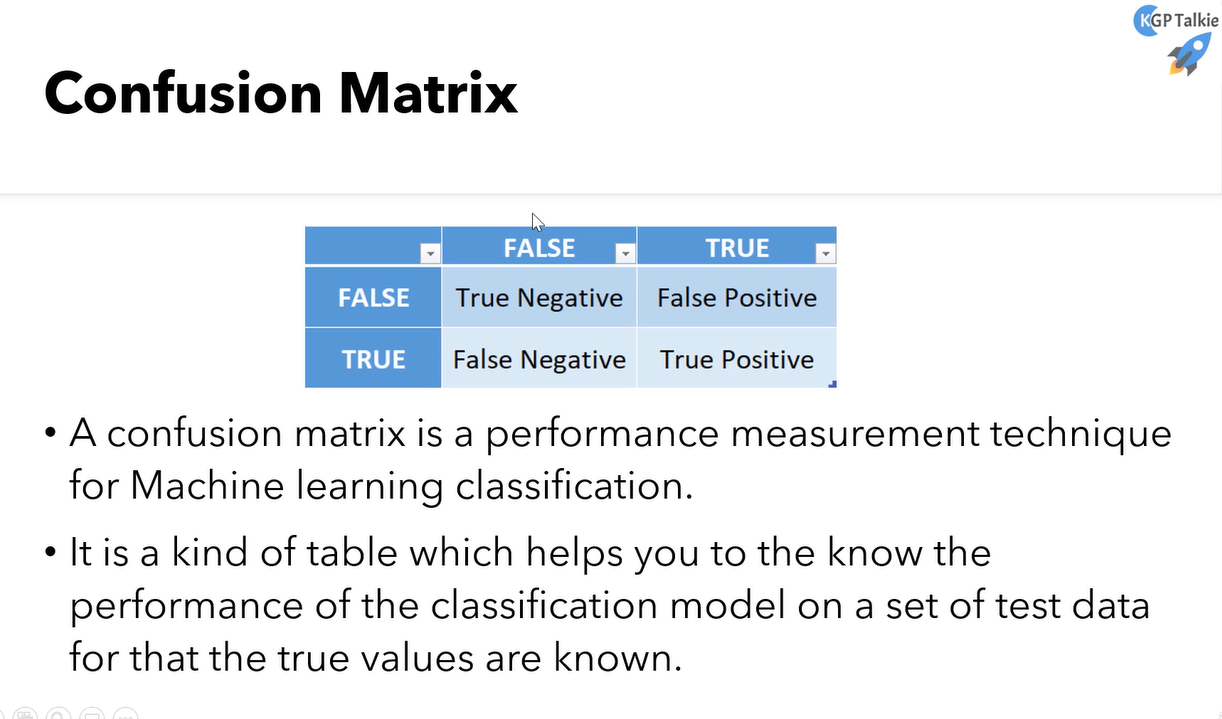

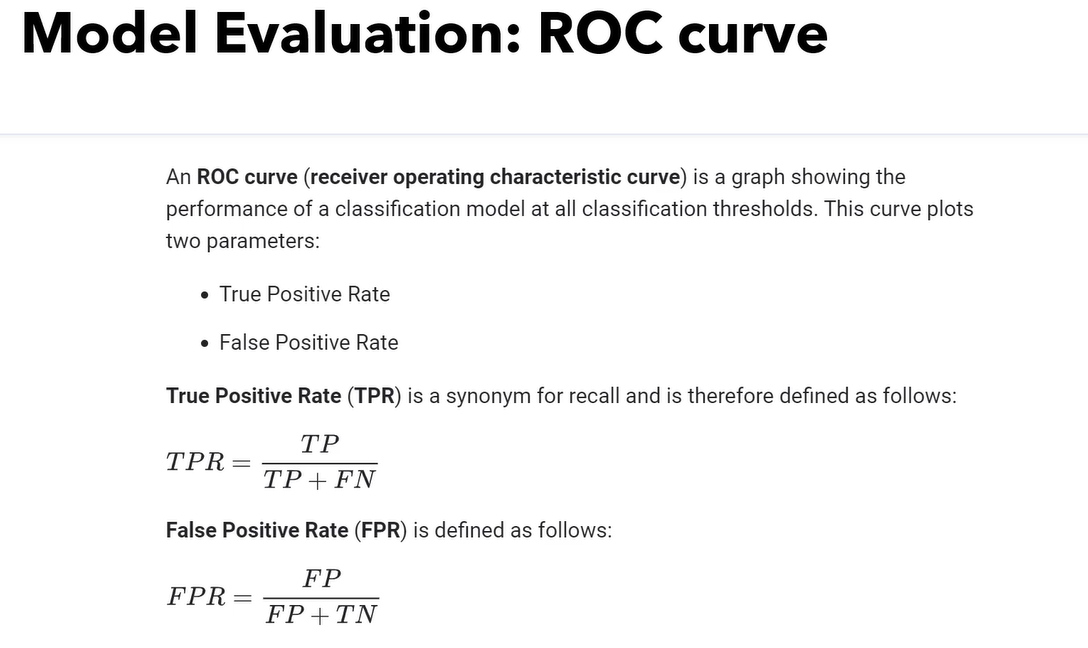

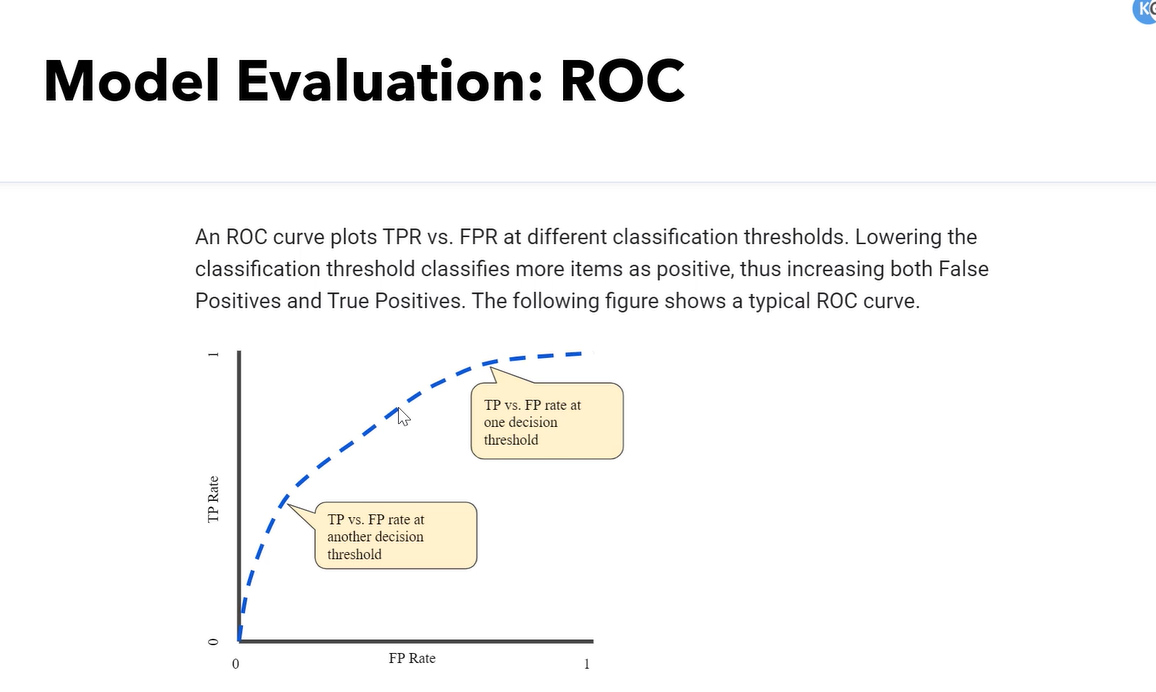

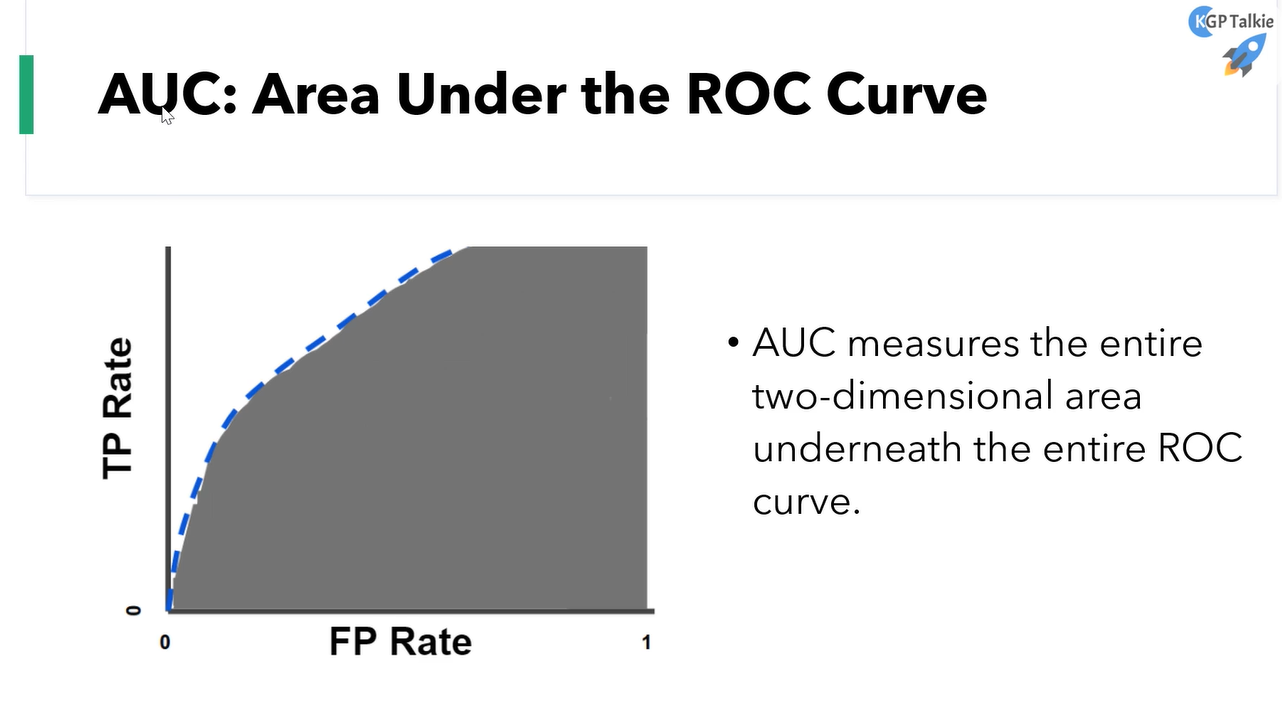

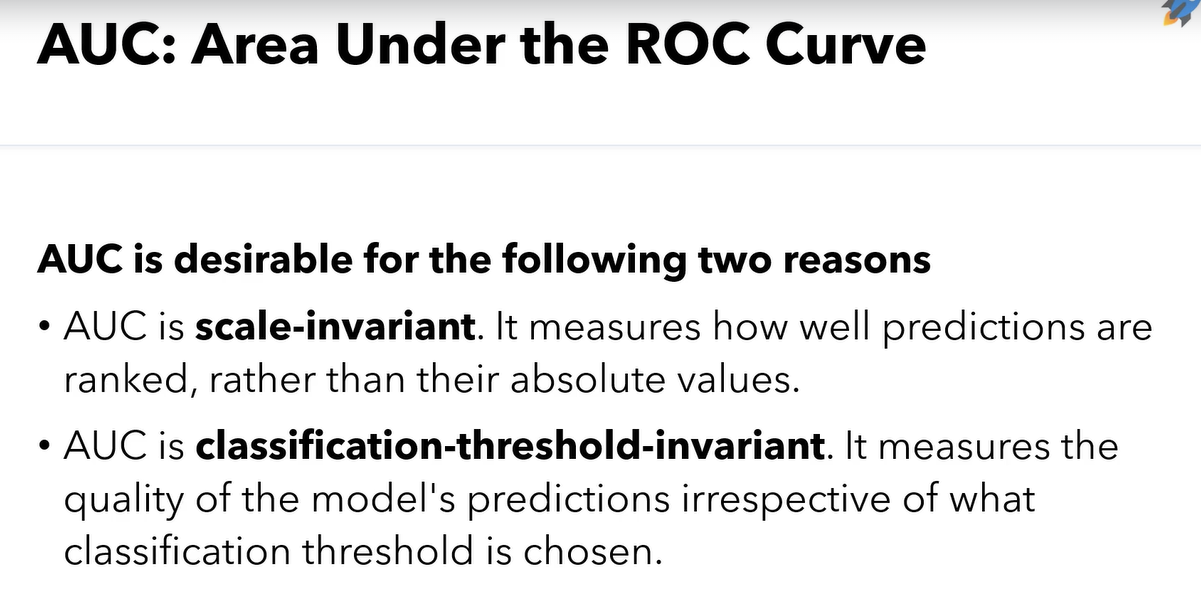

# Logistic Regression | SVM | Decision Tree | Random Forest

In [20]:
import sklearn

In [21]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [23]:
iris = datasets.load_iris()

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [24]:
features = iris.data
target = iris.target

In [13]:
features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [25]:
X_train , X_test , y_train , y_test = train_test_split(features , target , test_size = 0.3, random_state = 42)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # only standarsscale at training dataset not on test data

In [28]:
X_test = scaler.transform(X_test)

In [30]:
X_test

array([[ 0.3100623 , -0.50256349,  0.484213  , -0.05282593],
       [-0.17225683,  1.89603497, -1.26695916, -1.27039917],
       [ 2.23933883, -0.98228318,  1.76840592,  1.43531914],
       [ 0.18948252, -0.26270364,  0.36746819,  0.35303182],
       [ 1.15412078, -0.50256349,  0.54258541,  0.2177459 ],
       [-0.53399618,  0.93659559, -1.38370397, -1.13511325],
       [-0.29283662, -0.26270364, -0.15788346,  0.08245999],
       [ 1.27470056,  0.21701605,  0.71770262,  1.43531914],
       [ 0.43064208, -1.94172256,  0.36746819,  0.35303182],
       [-0.05167705, -0.74242333,  0.01723376, -0.05282593],
       [ 0.79238143,  0.4568759 ,  0.71770262,  1.0294614 ],
       [-1.25747488, -0.02284379, -1.44207638, -1.540971  ],
       [-0.4134164 ,  1.17645543, -1.50044878, -1.40568508],
       [-1.1368951 ,  0.21701605, -1.38370397, -1.540971  ],
       [-0.89573553,  1.89603497, -1.38370397, -1.27039917],
       [ 0.55122187,  0.69673574,  0.484213  ,  0.48831773],
       [ 0.79238143, -0.

In [31]:
logit = LogisticRegression()
svm = LinearSVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [32]:
from sklearn.metrics import accuracy_score

In [44]:
def model_training(X_train, X_test , y_train , y_test, model , text):
    model.fit(X_train , y_train)
    y_logit = model.predict(X_test)
    acc = accuracy_score(y_test , y_logit)
    print(text , acc)


In [38]:
%%timeit
model_training(X_train , X_test , y_train , y_test, logit , 'Logistic Regression')

5.08 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%%timeit
model_training(X_train , X_test , y_train , y_test, svm , 'SVM:')

3.25 ms ± 288 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [41]:
%%timeit
model_training(X_train , X_test , y_train , y_test, dt , 'Decision Tree:')

4.86 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [42]:
%%timeit
model_training(X_train , X_test , y_train , y_test, rf , 'Random forest:')

291 ms ± 18.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
model_training(X_train , X_test , y_train , y_test, logit , 'Logistic Regression')
model_training(X_train , X_test , y_train , y_test, svm , 'SVM:')
model_training(X_train , X_test , y_train , y_test, dt , 'Decision Tree:')
model_training(X_train , X_test , y_train , y_test, rf , 'Random forest:')

Logistic Regression 1.0
SVM: 0.9555555555555556
Decision Tree: 1.0
Random forest: 1.0
